# K-Nearest Neighbour (KNN)

## 1. Introduction

### Related Work

- Abdelmoula, A. K. (2015). Bank credit risk analysis with k-nearest-neighbor classifier: Case of tunisian banks. Journal of Accounting and Management Information Systems (JAMIS), 14(1), 79–106. https://www.econstor.eu/handle/10419/310582
- Vandika, A. Y., & Pannyiwi, R. (2024). Application of knn algorithm for credit risk analysis in savings and loan cooperatives. Jurnal ICT : Information and Communication Technologies, 15(2), 55–61. https://doi.org/10.35335/jict.v15i2.174 

The application of the k-nearest neighbors (KNN) algorithm for credit risk analysis has been explored across different financial contexts, with promising outcomes in improving predictive accuracy and decision support in banking and microfinance sectors.

Abdelmoula (2015) presents one of the earlier works in this domain, applying the KNN algorithm to analyze bank credit risk in the context of Tunisian financial institutions. The study demonstrates that KNN, particularly when coupled with suitable data normalization techniques, can effectively discriminate between solvent and insolvent clients.

More recently, Vandika and Pannyiwi (2024) investigated the application of KNN for credit risk analysis in savings and loan cooperatives in Indonesia. Their study emphasizes on the accessibility of KNN as a non-parametric method that can be implemented without strong distributional assumptions. 

While both studies provide valuable insights into the use of KNN for credit risk prediction, our work differs in two key respects. First, we evaluate KNN performance on a modern benchmark dataset with extensive preprocessing, hyperparameter tuning, and threshold analysis, which was not fully explored in prior studies. Second, our work introduces a more rigorous model evaluation pipeline, incorporating not only standard metrics like accuracy and F1-score but also micro/macro-averaged metrics and AUC plots to assess performance from multiple perspectives.

These extensions help bridge the gap between academic models and practical deployment in credit scoring systems, contributing to a more comprehensive evaluation framework that supports informed model selection in credit risk applications.

### Justification

**Why KNN is suitable for Credit Card Approval Prediction**

KNN is particularly well-suited for credit card approval prediction due to its interpretability, and flexibility. KNN is a non-parametric algorithm, it makes no assumptions about the underlying data distribution, which is advantageous in financial datasets that are often noisy, skewed, or heterogeneous. Its instance-based learning approach allows it to make decisions based on similarity to known past applicants, resembling how human credit officers might evaluate applications by comparing them to historical cases when credit card approval predictions need to be done manually. Additionally, KNN naturally supports incremental updates—new applicant data can be integrated into the system without the need for retraining, making it practical for the perpetually-updating financial environments. These properties collectively make KNN a compelling model for understanding client behavior and helps to inform credit lending decisions.

## 2. Model Implementation

#### Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#### Importing Dataset

In [2]:
train_df = pd.read_csv('train_dataset.csv')
test_df = pd.read_csv('test_dataset.csv')

In [3]:
train_df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,IS_EMPLOYED,TYPE
0,1,1,0,-0.579661,-0.728827,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,Unknown,-0.217680,1.106810,0,1
1,0,0,1,-0.579661,-0.728827,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,Unknown,-0.217680,1.541205,0,1
2,0,0,0,-0.579661,-0.242521,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,0,Core staff,-0.217680,-0.543892,1,1
3,0,0,0,-0.579661,0.376413,Pensioner,Higher education,Married,House / apartment,1,0,0,1,Unknown,-0.217680,1.019931,0,1
4,0,1,1,0.767400,0.730090,State servant,Higher education,Married,House / apartment,1,0,0,0,Managers,0.879204,-0.196376,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57841,0,0,0,3.461523,-1.138040,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,Sales staff,3.072971,0.131754,1,0
57842,1,0,0,0.767400,-0.270756,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Drivers,-1.314564,-0.029918,1,0
57843,1,0,1,-0.579661,0.383428,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,1,Laborers,-1.314564,-1.411993,1,0
57844,0,0,0,-0.579661,-0.707572,Pensioner,Incomplete higher,Separated,House / apartment,1,0,0,0,Unknown,-1.314564,1.368561,0,0


In [4]:
test_df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,IS_EMPLOYED,TYPE
0,1,0,0,0.767400,0.509042,Commercial associate,Secondary / secondary special,Single / not married,Co-op apartment,1,0,0,0,Security staff,-0.217680,-1.673319,1,1
1,0,0,1,-0.579661,0.155365,Pensioner,Secondary / secondary special,Widow,House / apartment,1,0,0,0,Unknown,-1.314564,1.367447,0,1
2,0,0,1,0.767400,-0.507779,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Laborers,0.879204,-1.412682,1,1
3,0,0,1,-0.579661,-0.596198,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,0,Unknown,-0.217680,1.454326,0,1
4,0,0,1,-0.579661,-1.170923,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Unknown,-0.217680,1.454326,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,1,1,1,-0.579661,1.923749,Working,Higher education,Separated,House / apartment,1,1,1,0,Managers,-1.314564,-0.283255,1,1
7288,0,0,1,-0.579661,-0.949875,State servant,Secondary / secondary special,Separated,House / apartment,1,0,0,0,Unknown,-1.314564,-0.370134,1,1
7289,0,0,0,-0.579661,-0.949875,Pensioner,Secondary / secondary special,Widow,House / apartment,1,0,1,0,Unknown,-1.314564,1.367447,0,1
7290,0,0,0,2.114462,-0.286731,State servant,Higher education,Married,House / apartment,1,0,0,0,Medicine staff,1.976088,-0.804529,1,1


In [5]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

In [6]:
X_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,IS_EMPLOYED
0,1,1,0,-0.579661,-0.728827,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,Unknown,-0.217680,1.106810,0
1,0,0,1,-0.579661,-0.728827,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,Unknown,-0.217680,1.541205,0
2,0,0,0,-0.579661,-0.242521,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,0,Core staff,-0.217680,-0.543892,1
3,0,0,0,-0.579661,0.376413,Pensioner,Higher education,Married,House / apartment,1,0,0,1,Unknown,-0.217680,1.019931,0
4,0,1,1,0.767400,0.730090,State servant,Higher education,Married,House / apartment,1,0,0,0,Managers,0.879204,-0.196376,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57841,0,0,0,3.461523,-1.138040,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,Sales staff,3.072971,0.131754,1
57842,1,0,0,0.767400,-0.270756,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Drivers,-1.314564,-0.029918,1
57843,1,0,1,-0.579661,0.383428,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,1,Laborers,-1.314564,-1.411993,1
57844,0,0,0,-0.579661,-0.707572,Pensioner,Incomplete higher,Separated,House / apartment,1,0,0,0,Unknown,-1.314564,1.368561,0


In [7]:
y_train

0        1
1        1
2        1
3        1
4        1
        ..
57841    0
57842    0
57843    0
57844    0
57845    0
Name: TYPE, Length: 57846, dtype: int64

In [8]:
X_test

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,IS_EMPLOYED
0,1,0,0,0.767400,0.509042,Commercial associate,Secondary / secondary special,Single / not married,Co-op apartment,1,0,0,0,Security staff,-0.217680,-1.673319,1
1,0,0,1,-0.579661,0.155365,Pensioner,Secondary / secondary special,Widow,House / apartment,1,0,0,0,Unknown,-1.314564,1.367447,0
2,0,0,1,0.767400,-0.507779,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Laborers,0.879204,-1.412682,1
3,0,0,1,-0.579661,-0.596198,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,0,Unknown,-0.217680,1.454326,0
4,0,0,1,-0.579661,-1.170923,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Unknown,-0.217680,1.454326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,1,1,1,-0.579661,1.923749,Working,Higher education,Separated,House / apartment,1,1,1,0,Managers,-1.314564,-0.283255,1
7288,0,0,1,-0.579661,-0.949875,State servant,Secondary / secondary special,Separated,House / apartment,1,0,0,0,Unknown,-1.314564,-0.370134,1
7289,0,0,0,-0.579661,-0.949875,Pensioner,Secondary / secondary special,Widow,House / apartment,1,0,1,0,Unknown,-1.314564,1.367447,0
7290,0,0,0,2.114462,-0.286731,State servant,Higher education,Married,House / apartment,1,0,0,0,Medicine staff,1.976088,-0.804529,1


In [9]:
y_test

0       1
1       1
2       1
3       1
4       1
       ..
7287    1
7288    1
7289    1
7290    1
7291    1
Name: TYPE, Length: 7292, dtype: int64

#### Data Processing

One-hot encoding is needed for categorical variables because the KNN algorithm cannot work directly with non-numeric data. One-hot encoding transforms categorical values into a binary matrix, allowing each category to be represented as a separate feature. This prevents the algorithm from assuming any ordinal relationship between categories and ensures fair distance computation in the KNN algorithm.

In [10]:
# One-hot encoding for the categorical features
categorical_cols = [5, 6, 7, 8, 13]  # Income type, Education, Marital status, Housing, Occupation
numeric_cols = [i for i in range(X_train.shape[1]) if i not in categorical_cols]
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_cat = encoder.fit_transform(X_train.iloc[:, categorical_cols])
X_test_cat = encoder.transform(X_test.iloc[:, categorical_cols])

encoded_feature_names = encoder.get_feature_names_out(X_train.columns[categorical_cols])
X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoded_feature_names, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=encoded_feature_names, index=X_test.index)

In [11]:
X_test_cat_df

,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7288,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7289,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7290,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X_test_cat_df

,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7288,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7289,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7290,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Merge back into dataframe
X_train_num_df = X_train.iloc[:, numeric_cols].reset_index(drop=True)
X_test_num_df = X_test.iloc[:, numeric_cols].reset_index(drop=True)

X_train_final = pd.concat([X_train_cat_df.reset_index(drop=True), X_train_num_df], axis=1)
X_test_final = pd.concat([X_test_cat_df.reset_index(drop=True), X_test_num_df], axis=1)

In [14]:
X_train_final

,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,...,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,IS_EMPLOYED
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,-0.579661,-0.728827,1,0,0,0,-0.217680,1.106810,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,-0.579661,-0.728827,1,0,0,0,-0.217680,1.541205,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,-0.579661,-0.242521,1,1,0,0,-0.217680,-0.543892,1
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,-0.579661,0.376413,1,0,0,1,-0.217680,1.019931,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0.767400,0.730090,1,0,0,0,0.879204,-0.196376,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57841,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,3.461523,-1.138040,1,1,0,0,3.072971,0.131754,1
57842,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0.767400,-0.270756,1,0,0,0,-1.314564,-0.029918,1
57843,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,-0.579661,0.383428,1,0,0,1,-1.314564,-1.411993,1
57844,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,-0.579661,-0.707572,1,0,0,0,-1.314564,1.368561,0


In [15]:
X_test_final

,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,...,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,IS_EMPLOYED
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0.767400,0.509042,1,0,0,0,-0.217680,-1.673319,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,-0.579661,0.155365,1,0,0,0,-1.314564,1.367447,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,0.767400,-0.507779,1,1,1,0,0.879204,-1.412682,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,-0.579661,-0.596198,1,0,0,0,-0.217680,1.454326,0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,-0.579661,-1.170923,1,0,0,0,-0.217680,1.454326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,-0.579661,1.923749,1,1,1,0,-1.314564,-0.283255,1
7288,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,-0.579661,-0.949875,1,0,0,0,-1.314564,-0.370134,1
7289,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,-0.579661,-0.949875,1,0,1,0,-1.314564,1.367447,0
7290,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,2.114462,-0.286731,1,0,0,0,1.976088,-0.804529,1


### Base Model for K-Nearest Neighbour (KNN)

In [16]:
knn = KNeighborsClassifier(n_neighbors=240) # Start off with the square root of n. Square root of n ~ 240
knn.fit(X_train_final, y_train)
y_pred = knn.predict(X_test_final)
y_pred_proba = knn.predict_proba(X_test_final)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.6412506856829402

Confusion Matrix:
 [[  32   28]
 [2588 4644]]

Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.53      0.02        60
           1       0.99      0.64      0.78      7232

    accuracy                           0.64      7292
   macro avg       0.50      0.59      0.40      7292
weighted avg       0.99      0.64      0.77      7292



In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("=== Confusion Matrix Derived Metrics ===")
print(f"TPR: {tpr:.4f}, TNR: {tnr:.4f}, FPR: {fpr:.4f}, FNR: {fnr:.4f}")

print("\n=== Micro-Averaged Metrics ===")
print("Precision (micro):", precision_score(y_test, y_pred, average='micro'))
print("Recall (micro):", recall_score(y_test, y_pred, average='micro'))
print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))

print("\n=== Macro-Averaged Metrics ===")
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("\n=== Weighted-Averaged Metrics ===")
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, y_pred, average='weighted'))

print("\n=== Threshold-Based Metrics ===")
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("PR AUC:", average_precision_score(y_test, y_pred_proba))

=== Confusion Matrix Derived Metrics ===
TPR: 0.6421, TNR: 0.5333, FPR: 0.4667, FNR: 0.3579

=== Micro-Averaged Metrics ===
Precision (micro): 0.6412506856829402
Recall (micro): 0.6412506856829402
F1 Score (micro): 0.6412506856829402

=== Macro-Averaged Metrics ===
Precision (macro): 0.5031102948865419
Recall (macro): 0.5877396755162242
F1 Score (macro): 0.4020612662493982

=== Weighted-Averaged Metrics ===
Precision (weighted): 0.9859284638883785
Recall (weighted): 0.6412506856829402
F1 Score (weighted): 0.7740184466868144

=== Threshold-Based Metrics ===
ROC AUC: 0.6599142699115044
PR AUC: 0.9947168460079938


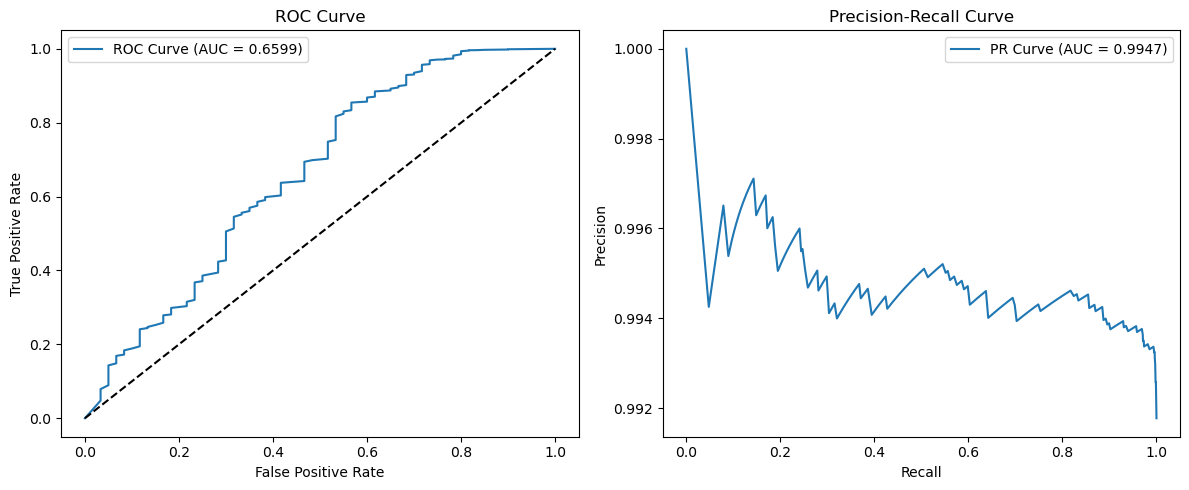

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR Curve (AUC = {average_precision_score(y_test, y_pred_proba):.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

plt.legend()
plt.tight_layout()
plt.show()

**Analysis of Evaluation Metrics**
1. Test Accuracy: 0.6413
    - Better than random guessing which will yield a test accuracy of 0.50 which indicates that some level of pattern recognition is happening
    - However, may be misleading due to class imbalance where class 1 dominates the dataset, so high accuracy does not mean good overall performance. The score doesn’t tell how well the model detects minority class.
2. Classification Report
    - Class 0 (Bad Client): 
        - Precision: 0.01
            - Only 1% of predicted class 0s are correct, hence showing that the model is not trustworthy when it predicts class 0
        - Recall: 0.53
            - Over half of true class 0s were detected
        - F1-Score: 0.02
            - Reflects the poor balance between precision and recall, indicating low reliability in handling the minority class
    - Class 1 (Good Client): 
        - Precision: 0.99
            - Nearly all predicted class 1s are correct
        - Recall: 0.64
            - Missed 36% of actual class 1s, indicating a significant number of false negatives
        - F1-Score: 0.78
            - Indicating a good balance between precision and recall
3. Averaged-Metrics
    - Micro-Average (Each instance have the same weight regardless of class): All metrics = 0.6413
        - In binary classification, since micro averaging does not distinguish between different classes and then just averages their metric scores, this averaging scheme is not prone to inaccurate values due to an unequally distributed test set. Micro-average precision and recall is equal to the accuracy and since micro-average F1 is the harmonic mean of the precision and recall, it is also the same as accuracy
    - Macro-Average (Each class have the same weight regardless of frequency): Precision: 0.50, Recall: 0.59, F1 Score: 0.40
        - More accurate representation of overall performance across both classes. Low values compared to micro-average show that performance is highly imbalanced between classes
    - Weighted-Average (Each class is weighted according to the frequency): Precision: 0.99, Recall: 0.64, F1 Score: 0.77
        - Gives a view of how well the model handles majority class and hides poor minority class performance.
4. AUC-ROC: 0.6599
    - Model is doing better than random at separating classes and has some discriminative power
5. PR-AUC: 0.9947
    - High precision over a wide range of recall values. Misleading in imbalanced datasets where the positive class is the majority as it easy to have high PR AUC values

**Why is the model doing poorly?**

A high value of k (240) means the model is taking the majority vote over a very large neighborhood. This causes extreme smoothing of the decision boundary, causing it to ignore local patterns, making the model less sensitive to minority classes or rare cases (like class 0 in this case). It also blurs the decision boundary so much that small variations between class distributions are lost. The KNN model becomes too simplistic as it generalises heavily and doesn’t capture the complexities of the decision space. This leads to underfitting, where majority class is fit decently because it dominates most neighborhoods but minority class is poorly captured as it is overwhelmed by class 1 in the local neighborhood.

**Further Improvements**
1. Hyperparameter tuning to for more flexible models to reduce bias
2. Utilising cost-sensitive learning
3. Feature scaling by selecting a better distance metric selection.
4. Trying ensemble approaches

### Hyperparameter Tuning for KNN

Tuning for:
- number of neighbours
- weights of neighbours (uniform, distance)
- distance metric (manhattan, euclidean, other minkowski distance)

In [19]:
param_grid = [
    {
        'n_neighbors': [30, 60, 120, 240],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski'],
        'p': [1, 1.5, 2, 2.5, 3] 
    }
]

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_final, y_train)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df[
    ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
].sort_values(by='mean_test_score', ascending=False)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'metric': 'minkowski', 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
Best Cross-Validated Accuracy: 0.9820732424064458


In [20]:
pd.set_option('display.max_colwidth', None)
results_df.head(10)

,params,mean_test_score,std_test_score,rank_test_score
1,"{'metric': 'minkowski', 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}",0.982073,0.004404,1
3,"{'metric': 'minkowski', 'n_neighbors': 30, 'p': 1.5, 'weights': 'distance'}",0.981866,0.004524,2
5,"{'metric': 'minkowski', 'n_neighbors': 30, 'p': 2, 'weights': 'distance'}",0.981485,0.004684,3
7,"{'metric': 'minkowski', 'n_neighbors': 30, 'p': 2.5, 'weights': 'distance'}",0.981157,0.004538,4
9,"{'metric': 'minkowski', 'n_neighbors': 30, 'p': 3, 'weights': 'distance'}",0.980984,0.004404,5
11,"{'metric': 'minkowski', 'n_neighbors': 60, 'p': 1, 'weights': 'distance'}",0.979981,0.004278,6
13,"{'metric': 'minkowski', 'n_neighbors': 60, 'p': 1.5, 'weights': 'distance'}",0.979446,0.004195,7
15,"{'metric': 'minkowski', 'n_neighbors': 60, 'p': 2, 'weights': 'distance'}",0.978841,0.003888,8
17,"{'metric': 'minkowski', 'n_neighbors': 60, 'p': 2.5, 'weights': 'distance'}",0.978650,0.003834,9
19,"{'metric': 'minkowski', 'n_neighbors': 60, 'p': 3, 'weights': 'distance'}",0.978495,0.003651,10


**Analysis**
1. Lower k = 30 outperforms other values of k: Reducing k to 30 reduces bias and allows the model to better fit the data.
2. Best results with p=1 (Manhattan distance): This indicates that the absolute differences between features provide better separation than Euclidean or higher-order distances. This is because Manhattan distance is more robust when features are sparse.
3. Use of distance-based weighting: All results use weights='distance', which helps improve performance by assigning more importance to closer neighbors.

In [21]:
param_grid = [
    {
        'n_neighbors': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
        'weights': ['distance'],
        'metric': ['minkowski'],
        'p': [1] 
    }
]

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_final, y_train)

results2_df = pd.DataFrame(grid_search.cv_results_)
results2_df = results2_df[
    ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
].sort_values(by='mean_test_score', ascending=False)

In [22]:
pd.set_option('display.max_colwidth', None)
results2_df.head(10)

,params,mean_test_score,std_test_score,rank_test_score
0,"{'metric': 'minkowski', 'n_neighbors': 25, 'p': 1, 'weights': 'distance'}",0.982488,0.004619,1
1,"{'metric': 'minkowski', 'n_neighbors': 26, 'p': 1, 'weights': 'distance'}",0.982402,0.004487,2
4,"{'metric': 'minkowski', 'n_neighbors': 29, 'p': 1, 'weights': 'distance'}",0.982350,0.004505,3
2,"{'metric': 'minkowski', 'n_neighbors': 27, 'p': 1, 'weights': 'distance'}",0.982333,0.004455,4
3,"{'metric': 'minkowski', 'n_neighbors': 28, 'p': 1, 'weights': 'distance'}",0.982298,0.004484,5
5,"{'metric': 'minkowski', 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}",0.982073,0.004404,6
7,"{'metric': 'minkowski', 'n_neighbors': 32, 'p': 1, 'weights': 'distance'}",0.982004,0.004505,7
8,"{'metric': 'minkowski', 'n_neighbors': 33, 'p': 1, 'weights': 'distance'}",0.981987,0.004371,8
6,"{'metric': 'minkowski', 'n_neighbors': 31, 'p': 1, 'weights': 'distance'}",0.981866,0.004299,9
9,"{'metric': 'minkowski', 'n_neighbors': 34, 'p': 1, 'weights': 'distance'}",0.981831,0.004333,10


**Analysis**
1. Adjusting k to values around 30 leads to very negligible difference in the cross validation scores: This shows that when k reduces from 30 to 25, the reduction in the amount of bias of the model is likely higher than the increase in the amount of variance in the model. We will fit both k=25 and k=30

### Improved KNN Model after Hyperparameter Tuning

In [23]:
knn_best = KNeighborsClassifier(
    n_neighbors=30,
    weights='distance',
    metric='minkowski',
    p=1
)

knn_best.fit(X_train_final, y_train)
y_pred = knn_best.predict(X_test_final)
y_pred_proba = knn_best.predict_proba(X_test_final)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9773724629731212
Confusion Matrix:
 [[  26   34]
 [ 131 7101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.43      0.24        60
           1       1.00      0.98      0.99      7232

    accuracy                           0.98      7292
   macro avg       0.58      0.71      0.61      7292
weighted avg       0.99      0.98      0.98      7292



In [24]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("=== Confusion Matrix Derived Metrics ===")
print(f"TPR: {tpr:.4f}, TNR: {tnr:.4f}, FPR: {fpr:.4f}, FNR: {fnr:.4f}")

print("\n=== Micro-Averaged Metrics ===")
print("Precision (micro):", precision_score(y_test, y_pred, average='micro'))
print("Recall (micro):", recall_score(y_test, y_pred, average='micro'))
print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))

print("\n=== Macro-Averaged Metrics ===")
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("\n=== Weighted-Averaged Metrics ===")
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, y_pred, average='weighted'))

print("\n=== Threshold-Based Metrics ===")
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("PR AUC:", average_precision_score(y_test, y_pred_proba))

=== Confusion Matrix Derived Metrics ===
TPR: 0.9819, TNR: 0.4333, FPR: 0.5667, FNR: 0.0181

=== Micro-Averaged Metrics ===
Precision (micro): 0.9773724629731212
Recall (micro): 0.9773724629731212
F1 Score (micro): 0.9773724629731212

=== Macro-Averaged Metrics ===
Precision (macro): 0.5804199268877294
Recall (macro): 0.707609697640118
F1 Score (macro): 0.6140733420386388

=== Weighted-Averaged Metrics ===
Precision (weighted): 0.9884084033572667
Recall (weighted): 0.9773724629731212
F1 Score (weighted): 0.9823533837831063

=== Threshold-Based Metrics ===
ROC AUC: 0.7540053466076695
PR AUC: 0.995993694957743


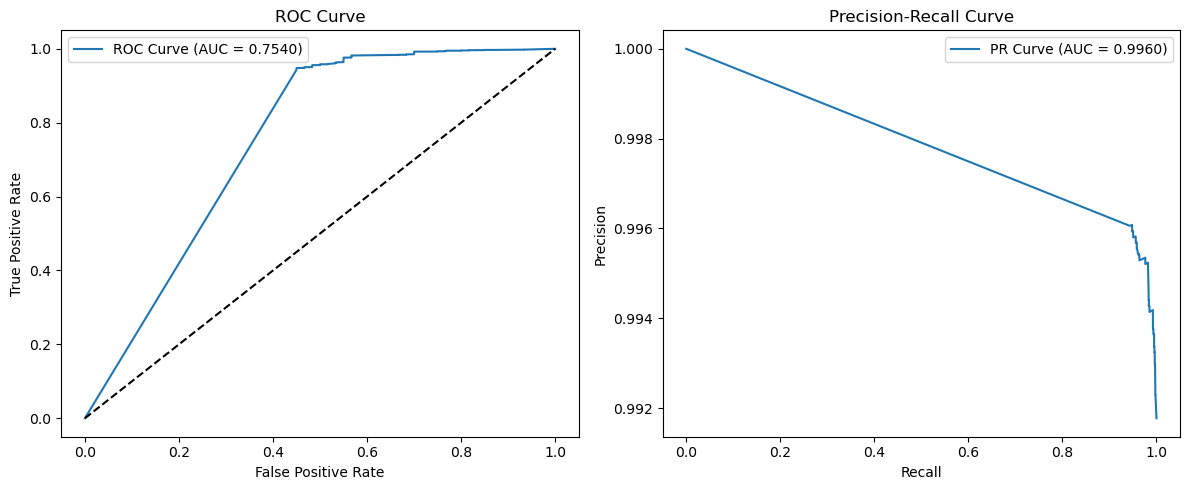

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR Curve (AUC = {average_precision_score(y_test, y_pred_proba):.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

plt.legend()
plt.tight_layout()
plt.show()

**Analysis of Evaluation Metrics**
1. Test Accuracy: 0.9774
    - Very high test accuracy indicates the model is capturing meaningful patterns in the data. However, due to class imbalance, accuracy alone may still be misleading as it is dominated by performance on class 1 (good clients).
2. Classification Report
    - Class 0 (Bad Client):
        - Precision: 0.17:
            - Only 17% of predicted class 0s are truly class 0, so model’s predictions for bad clients still lack reliability    
        - Recall: 0.43
            - Detected 43% of actual bad clients. It showed significant improvement from before
        - F1-Score: 0.24
            - This reflects that the model has improved but there is still limited effectiveness in handling the minority class
    - Class 1 (Good Client):
        - Precision: 1.00
            - All predicted good clients are correct showing that the model has excellent reliability for class 1
        - Recall: 0.98
            - Detected nearly all actual good clients, with very few false negatives 
        - F1-Score: 0.99
            - Shows good balance between precision and recall for class 1
3. Averaged Metrics
    - Micro-Average (Each instance has the same weight regardless of class): All metrics = 0.9774
        - Because this metric aggregates over all individual predictions, it aligns with the accuracy.
    - Macro-Average (Each class has the same weight regardless of frequency): Precision: 0.58, Recall: 0.71, F1 Score: 0.61
        - Shows more balanced performance across both classes, revealing that the model still underperforms on minority class (class 0) despite overall strong accuracy
    - Weighted-Average (Each class is weighted by frequency): Precision: 0.99, Recall: 0.98, F1 Score: 0.98
        - The values are skewed toward class 1, which inflates the values even though class 0 performance remains weak
4. AUC-ROC: 0.7540
    - Significantly improved over the base model (0.66). This indicates that the model has stronger class discrimination capabilities than the previous model.
5. PR-AUC: 0.9960
    - Extremely high area under the precision-recall curve, indicating that when the model predicts class 1, it's very reliable and precise

**Why is the model doing better?**

Smaller k value of 30 reduces over-smoothing of decision boundaries and makes the model more responsive to local structures, allowing it to better capture patterns in both majority and minority classes. Manhattan distance appears to be more effective in handling the structure of the dataset which is likely due to its better behavior with high-dimensional or unevenly scaled features. Also, giving more influence to closer neighbors helps in distinguishing borderline cases, especially useful when the dataset is imbalanced. The decrease in the bias of the model is greater than the increase in variance, hence leading to better bias-variance tradeoff.

**Further Improvement**
1. Construct a Principal Component Analysis (PCA) + K-Nearest Neighbour (KNN) Pipeline
    - This can reduce dimensionality as KNN is sensitive to high-dimensional spaces and suffers from the curse of dimensionality, which can inflates distance calculations and lowers performance of the model, especially in this data set with 52 features. 
    - PCA can also help to improve distance-based separation. By projecting the data onto directions of maximum variance, it can potentially group similar clients (especially class 0) closer in lower dimensions, making KNN more effective
    - PCA can also reduce noise and redundancy by removing less informative or noisy components, thus helping the model focus on more meaningful features. With this, KNN is less likely to overfit on irrelevant feature variations, improving generalisation

In [26]:
knn_best2 = KNeighborsClassifier(
    n_neighbors=25,
    weights='distance',
    metric='minkowski',
    p=1
)

knn_best2.fit(X_train_final, y_train)
y_pred = knn_best2.predict(X_test_final)
y_pred_proba = knn_best2.predict_proba(X_test_final)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9777838727372463
Confusion Matrix:
 [[  25   35]
 [ 127 7105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.42      0.24        60
           1       1.00      0.98      0.99      7232

    accuracy                           0.98      7292
   macro avg       0.58      0.70      0.61      7292
weighted avg       0.99      0.98      0.98      7292



In [27]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("=== Confusion Matrix Derived Metrics ===")
print(f"TPR: {tpr:.4f}, TNR: {tnr:.4f}, FPR: {fpr:.4f}, FNR: {fnr:.4f}")

print("\n=== Micro-Averaged Metrics ===")
print("Precision (micro):", precision_score(y_test, y_pred, average='micro'))
print("Recall (micro):", recall_score(y_test, y_pred, average='micro'))
print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))

print("\n=== Macro-Averaged Metrics ===")
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("\n=== Weighted-Averaged Metrics ===")
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, y_pred, average='weighted'))

print("\n=== Threshold-Based Metrics ===")
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("PR AUC:", average_precision_score(y_test, y_pred_proba))

=== Confusion Matrix Derived Metrics ===
TPR: 0.9824, TNR: 0.4167, FPR: 0.5833, FNR: 0.0176

=== Micro-Averaged Metrics ===
Precision (micro): 0.9777838727372463
Recall (micro): 0.9777838727372463
F1 Score (micro): 0.9777838727372463

=== Macro-Averaged Metrics ===
Precision (macro): 0.5797858617131063
Recall (macro): 0.6995529129793511
F1 Score (macro): 0.612288569493092

=== Weighted-Averaged Metrics ===
Precision (weighted): 0.9882634998163021
Recall (weighted): 0.9777838727372463
F1 Score (weighted): 0.9825332467342043

=== Threshold-Based Metrics ===
ROC AUC: 0.7553489122418879
PR AUC: 0.9960149238205595


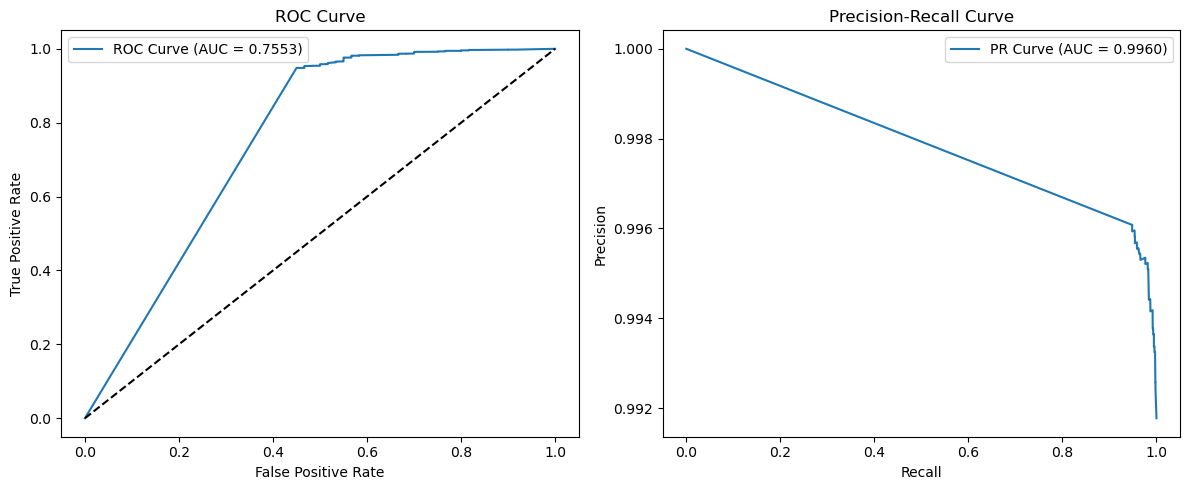

In [28]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR Curve (AUC = {average_precision_score(y_test, y_pred_proba):.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

plt.legend()
plt.tight_layout()
plt.show()

**Analysis of Evaluation Metrics**
- To test for the effect of lowering the value of k from 30 to 25 as the reduction of k did not result in a significant change in the cross-validation score
- The metrics showed slight improvement in accuracy (0.0004), at the expense of a lower precision and recall for class 0

## Principal Component Analysis + K-Nearest Neighbour

Text(0, 0.5, 'Cumulative Explained Variance')

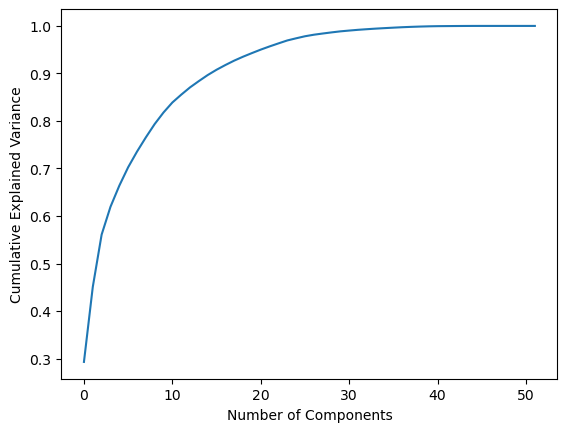

In [29]:
pca = PCA().fit(X_train_final)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

**Analysis**
- The first 10 components capture over 90% of the total variance
- Beyond 20 components, the gain in explained variance becomes marginal, suggesting diminishing returns with increase in principal components

In [30]:
pipe = Pipeline([
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'pca__n_components': [5, 10, 20, 30, 40], 
    'knn__n_neighbors': [15, 30, 60],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski'],
    'knn__p': [1, 2]
}

grid_search3 = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search3.fit(X_train_final, y_train)

results3_df = pd.DataFrame(grid_search3.cv_results_)
results3_df = results3_df[
    ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
].sort_values(by='mean_test_score', ascending=False)

print("Best parameters:", grid_search3.best_params_)
print("Best CV accuracy:", grid_search3.best_score_)

Best parameters: {'knn__metric': 'minkowski', 'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'distance', 'pca__n_components': 40}
Best CV accuracy: 0.9845626179042387


In [31]:
pd.set_option('display.max_colwidth', None)
results3_df.head(10)

,params,mean_test_score,std_test_score,rank_test_score
9,"{'knn__metric': 'minkowski', 'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'distance', 'pca__n_components': 40}",0.984563,0.004614,1
8,"{'knn__metric': 'minkowski', 'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'distance', 'pca__n_components': 30}",0.984390,0.004755,2
17,"{'knn__metric': 'minkowski', 'knn__n_neighbors': 15, 'knn__p': 2, 'knn__weights': 'distance', 'pca__n_components': 20}",0.984113,0.005158,3
19,"{'knn__metric': 'minkowski', 'knn__n_neighbors': 15, 'knn__p': 2, 'knn__weights': 'distance', 'pca__n_components': 40}",0.983802,0.004716,4
18,"{'knn__metric': 'minkowski', 'knn__n_neighbors': 15, 'knn__p': 2, 'knn__weights': 'distance', 'pca__n_components': 30}",0.983767,0.004850,5
7,"{'knn__metric': 'minkowski', 'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'distance', 'pca__n_components': 20}",0.983733,0.005017,6
16,"{'knn__metric': 'minkowski', 'knn__n_neighbors': 15, 'knn__p': 2, 'knn__weights': 'distance', 'pca__n_components': 10}",0.982868,0.004984,7
6,"{'knn__metric': 'minkowski', 'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'distance', 'pca__n_components': 10}",0.982851,0.004735,8
29,"{'knn__metric': 'minkowski', 'knn__n_neighbors': 30, 'knn__p': 1, 'knn__weights': 'distance', 'pca__n_components': 40}",0.982229,0.004594,9
28,"{'knn__metric': 'minkowski', 'knn__n_neighbors': 30, 'knn__p': 1, 'knn__weights': 'distance', 'pca__n_components': 30}",0.981866,0.004477,10


In [32]:
best_pipeline = Pipeline([
    ('pca', PCA(n_components=40)),
    ('knn', KNeighborsClassifier(
        n_neighbors=15,
        weights='distance',
        metric='minkowski',
        p=1
    ))
])

best_pipeline.fit(X_train_final, y_train)
y_pred = best_pipeline.predict(X_test_final)
y_pred_proba = best_pipeline.predict_proba(X_test_final)[:, 1]

print("=== Basic Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

=== Basic Metrics ===
Accuracy: 0.9799780581459133
Confusion Matrix:
 [[  25   35]
 [ 111 7121]]
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.42      0.26        60
           1       1.00      0.98      0.99      7232

    accuracy                           0.98      7292
   macro avg       0.59      0.70      0.62      7292
weighted avg       0.99      0.98      0.98      7292



In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("=== Confusion Matrix Derived Metrics ===")
print(f"TPR: {tpr:.4f}, TNR: {tnr:.4f}, FPR: {fpr:.4f}, FNR: {fnr:.4f}")

print("\n=== Micro-Averaged Metrics ===")
print("Precision (micro):", precision_score(y_test, y_pred, average='micro'))
print("Recall (micro):", recall_score(y_test, y_pred, average='micro'))
print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))

print("\n=== Macro-Averaged Metrics ===")
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("\n=== Weighted-Averaged Metrics ===")
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, y_pred, average='weighted'))

print("\n=== Threshold-Based Metrics ===")
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("PR AUC:", average_precision_score(y_test, y_pred_proba))

=== Confusion Matrix Derived Metrics ===
TPR: 0.9847, TNR: 0.4167, FPR: 0.5833, FNR: 0.0153

=== Micro-Averaged Metrics ===
Precision (micro): 0.9799780581459133
Recall (micro): 0.9799780581459133
F1 Score (micro): 0.9799780581459133

=== Macro-Averaged Metrics ===
Precision (macro): 0.5894662644263966
Recall (macro): 0.7006591076696165
F1 Score (macro): 0.6224773479032981

=== Weighted-Averaged Metrics ===
Precision (weighted): 0.9884335841637718
Recall (weighted): 0.9799780581459133
F1 Score (weighted): 0.9838069834529085

=== Threshold-Based Metrics ===
ROC AUC: 0.7499688882743363
PR AUC: 0.9959163989754917


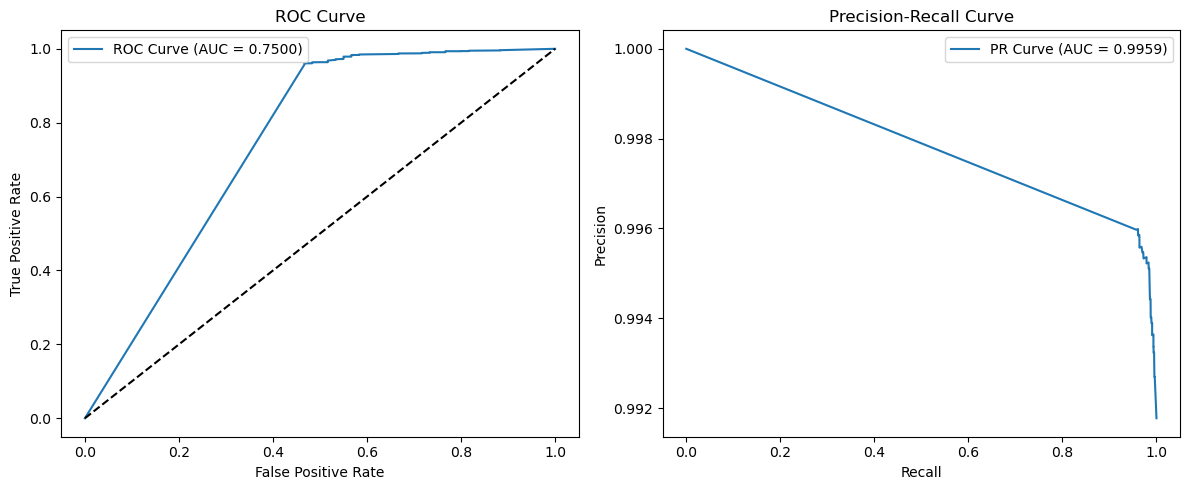

In [34]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR Curve (AUC = {average_precision_score(y_test, y_pred_proba):.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

plt.legend()
plt.tight_layout()
plt.show()

**Analysis of Evaluation Metrics**
1. Test Accuracy: 0.97998
    - Very high accuracy suggests the model effectively captures underlying structure in the data. However, since the dataset is imbalanced, accuracy alone should not be the sole evaluation metric as class 1's performance heavily influences this value.
2. Classification Report
    - Class 0 (Bad Client):
        - Precision: 0.18
            - Only 18% of predicted class 0s are correct, indicating the model still struggles with precision on minority class. However, it has performed better than the other models
        - Recall: 0.42
            - The model identifies 42% of true class 0s, showing a moderate improvement from the base model but shows that PCA does not really help with reducing the recall of class 0
        - F1-Score: 0.26
            - The low score reflects poor overall effectiveness in detecting bad customers, but however, performs much better than the base model
    - Class 1 (Good Client):
        - Precision: 1.00
            - This shows that nearly all predicted good clients are truly good
        - Recall: 0.98
            - Very few good clients were missed, hence indicating strong reliability in detecting good clients
        - F1-Score: 0.99
            - A nearly perfect score which demonstrates the model’s ability in predicting the class of good clients
3. Averaged Metrics
    - Micro-Average (Each instance has the same weight regardless of class): All metrics = 0.97998
        - Reflects overall accuracy across all observations as all observations are weighted equally
    - Macro-Average (Each class has the same weight regardless of frequency): Precision: 0.59, Recall: 0.70, F1 Score: 0.62
        - Gives equal weight to both classes — these metrics reveal that the model’s performance on class 0 is still lagging.
    - Weighted-Average (Each class is weighted by frequency): Precision: 0.99, Recall: 0.98, F1 Score: 0.98
        - Heavily influenced by class 1 due to its dominance in the dataset. These look impressive but mask the poor precision on class 0.
4. AUC-ROC: 0.7500
    - Shows moderate class discrimination which is better than random prediction in distinguishing bad clients from good ones. It didn't now show a very drastic improvement from the previous model without PCA
5. PR-AUC: 0.9959
    - Very high precision-recall AUC, but is however dominated by class 1 behavior. This shows that the model is highly confident and consistent when predicting class 1

**Why the model did not show significant improvements**
- It may be because PCA is unsupervised. PCA reduces dimensionality without knowing the class labels. It preserves variance but not necessarily the features most important for classification.
- It suggests that the original dataset had been well-preprocessed and had relevant features retained. Hence, applying PCA might remove subtle discriminatory signals that were actually helpful. Furthermore, the tuned KNN model already uses distance weighting, which partially mitigates noise or irrelevant features by lowering the weight of distant neighbors. PCA’s denoising effect is less impactful in this case.

As a result, features that help differentiate between class 0 and class 1 might be compressed or lost.
While PCA is a useful dimensionality reduction technique, in this case, it did not lead to significant performance improvement over a well-tuned KNN model as the changes in the evaluation metrics were very negligible. The original feature space was already compact and discriminative enough, and the class imbalance remains the dominant limitation affecting model performance.

In [35]:
best_pipeline2 = Pipeline([
    ('pca', PCA(n_components=20)),
    ('knn', KNeighborsClassifier(
        n_neighbors=15,
        weights='distance',
        metric='minkowski',
        p=1
    ))
])

best_pipeline2.fit(X_train_final, y_train)
y_pred = best_pipeline2.predict(X_test_final)
y_pred_proba = best_pipeline2.predict_proba(X_test_final)[:, 1]

print("=== Basic Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

=== Basic Metrics ===
Accuracy: 0.9780581459133296
Confusion Matrix:
 [[  26   34]
 [ 126 7106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.43      0.25        60
           1       1.00      0.98      0.99      7232

    accuracy                           0.98      7292
   macro avg       0.58      0.71      0.62      7292
weighted avg       0.99      0.98      0.98      7292



In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("=== Confusion Matrix Derived Metrics ===")
print(f"TPR: {tpr:.4f}, TNR: {tnr:.4f}, FPR: {fpr:.4f}, FNR: {fnr:.4f}")

print("\n=== Micro-Averaged Metrics ===")
print("Precision (micro):", precision_score(y_test, y_pred, average='micro'))
print("Recall (micro):", recall_score(y_test, y_pred, average='micro'))
print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))

print("\n=== Macro-Averaged Metrics ===")
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("\n=== Weighted-Averaged Metrics ===")
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, y_pred, average='weighted'))

print("\n=== Threshold-Based Metrics ===")
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("PR AUC:", average_precision_score(y_test, y_pred_proba))

=== Confusion Matrix Derived Metrics ===
TPR: 0.9826, TNR: 0.4333, FPR: 0.5667, FNR: 0.0174

=== Micro-Averaged Metrics ===
Precision (micro): 0.9780581459133296
Recall (micro): 0.9780581459133296
F1 Score (micro): 0.9780581459133296

=== Macro-Averaged Metrics ===
Precision (macro): 0.5831453634085213
Recall (macro): 0.707955383480826
F1 Score (macro): 0.6170751303635476

=== Weighted-Averaged Metrics ===
Precision (weighted): 0.9884565362941088
Recall (weighted): 0.9780581459133296
F1 Score (weighted): 0.9827488856634116

=== Threshold-Based Metrics ===
ROC AUC: 0.765944183259587
PR AUC: 0.9961884679755334


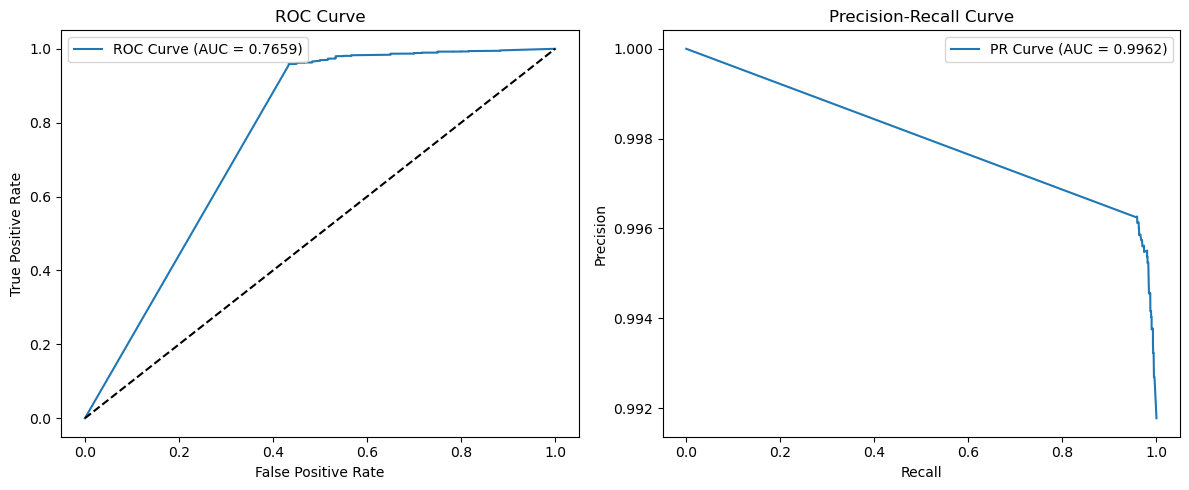

In [37]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR Curve (AUC = {average_precision_score(y_test, y_pred_proba):.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

plt.legend()
plt.tight_layout()
plt.show()

**Analysis**
- Since the pipeline model of PCA + KNN with tuned parameteres did not show much improvement from a tuned pure KNN model, it is expected that reducing the number of principal components did not change the evaluation metrics much and is proven in the metrics and graphs as shown above. As much as the total amount of preserved variance did not increase much from a principal component of 40 to principal component of 20, a reduction in the number of principal components did not result in much changes in the performance of the model as it is likely that PCA is ineffective in this case with the reasons postulated in the previous analysis

## 3. Conclusion

**Summary**

Based on the evaluation of different models, it is evident that the tuned KNN model without PCA is sufficient and performs comparably to the PCA-enhanced version. The marginal differences in accuracy, F1 score, and ROC AUC suggest that the inclusion of PCA does not provide significant added value for this particular dataset. This is likely because the original feature space is already low-dimensional and well-structured, and the tuned KNN model with appropriate distance metrics and weighting is capable of handling noise and redundancy effectively. Therefore, for the task of credit card approval prediction, the pure, well-tuned KNN model is both computationally efficient and sufficiently reliable.

In the context of real-world credit card approval, the model’s strengths and limitations align with how financial institutions operate. While the model shows low precision and recall for class 0 (bad clients), this does not necessarily pose a critical risk in practice. Financial institutions often have multi-tiered screening systems, where machine learning models act as preliminary filters, followed by manual review or additional verification steps for borderline or high-risk applications. This multi-layer decision-making process helps mitigate the impact of  approving potentially bad clients. On the other hand, the model’s exceptionally high precision and recall for class 1 (good clients) is crucial. Approving reliable clients consistently ensures steady cash flow and sustained revenue for banks and lenders, which is vital for operational stability. Hence, despite perfect discrimination between good and bad applicants being very challenging, the current model strikes a practical balance between risk management and financial viability in credit approval workflows.

**Future Improvements**
1. Adding more contextually relevant features could help the model better capture hidden patterns in client behavior, some potential important features can include:
    - Number of recent credit applications which helps detect risky behavior like credit shopping or demand for liquidity
    - Presence of other active loans which can help to indicate potential repayment burden or over-leverage
    - Past rejected applications that is useful for understanding historical lender decisions
2. Apply feature engineering techniques by transforming or creating new features to improve model expressiveness:
    - Debt-to-income ratio that combines income and outstanding debts gives a clearer view of affordability of credit
    - Credit utilization rate 
    - Customer segmentation buckets (via methods such as k-means) to segregate clusters of different type of clients
    - Interaction terms (For example: income × age or education level × family size — can capture nonlinear effects)
3. Explore Ensemble  Models
    - Combining KNN with decision trees, logistic regression, or random forest to produce predictions
    - Using KNN as a base learner and train a meta-model (such as logistic regression or XGBoost) on the outputs
    - Trying gradient boosting models like XGBoost that can inherently handle class imbalance